In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
import matplotlib.pyplot as plt

SMALL_SIZE = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [161]:
df = pd.read_csv('experiments.csv')

In [162]:
df['Train-entropy'] = df['Train-entropy'] / 8 / 2
df['Val-entropy'] = df['Val-entropy'] / 8 / 2

In [163]:
df.head()

,type,topn,rotations,Labelled-data-count,Labelled-data,Train-affordance,Train-entropy,Train-expected-distance-0.1-max,Train-expected-distance-0.2-max,Train-expected-distance,...,Train-top-5,Val-affordance,Val-entropy,Val-expected-distance-0.1-max,Val-expected-distance-0.2-max,Val-expected-distance,Val-loss,Val-ranking,Val-success-rate,Val-top-5-success-rate
0,teacher,1,8,20,0.01,0.001699,3.686250,0.03450,0.05382,0.1951,...,0.9462,0.000633,3.731875,0.04589,0.08209,0.2663,7.987,0.08900,0.5556,0.8774
1,teacher,1,8,40,0.02,0.001999,3.764375,0.03551,0.05497,0.1948,...,0.9656,0.000704,3.860625,0.04291,0.07702,0.2606,7.265,0.05261,0.6204,0.9143
2,teacher,1,8,100,0.05,0.002103,3.476250,0.03446,0.05377,0.1745,...,0.9413,0.000941,3.533750,0.04142,0.06901,0.2356,7.111,0.03718,0.6333,0.9205
3,teacher,1,8,200,0.10,0.001756,3.681250,0.03639,0.05762,0.2045,...,0.9545,0.000987,3.706875,0.04064,0.06610,0.2373,6.719,0.03382,0.6747,0.9372
4,teacher,1,8,400,0.20,0.001575,3.696875,0.03657,0.05897,0.2062,...,0.9547,0.001053,3.709375,0.04021,0.06552,0.2251,6.550,0.03324,0.7020,0.9479


In [164]:
teacher_scaling = df[df.type == 'teacher']
student_scaling = df[df.type == 'student']
student_topn_ablation = df[df.type == 'student-topn-ablation']
student_angle_ablation = df[df.type == 'student-angle-ablation']

In [165]:
def compare_(x, y, xlabel, ylabel, xlog=False, ylog=False, label=None, marker=None):
    plt.plot(x, y, label=label, marker=marker)
    plt.xlabel(xlabel)
    # plt.ylim([0., 1.])
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
    plt.ylabel(ylabel)
    # plt.grid('on')
    
def compare(df, x, y, xlabel, ylabel, xlog=False, ylog=False, label=None, marker=None):
    compare_(df.loc[:, x].to_numpy(), df.loc[:, y].to_numpy(), xlabel, ylabel, xlog, ylog, label, marker)

In [166]:
teacher_scaling['Val-success-rate']

0    0.5556
1    0.6204
2    0.6333
3    0.6747
4    0.7020
5    0.7109
6    0.7240
Name: Val-success-rate, dtype: float64

In [167]:
student_scaling['Val-success-rate']

7     0.5813
8     0.6825
9     0.7445
10    0.7562
11    0.8545
12    0.8326
13    0.8516
Name: Val-success-rate, dtype: float64

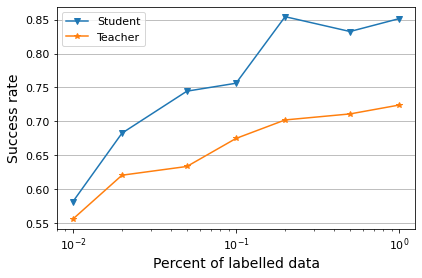

In [168]:
compare(student_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Success rate', label='Student', xlog=True, marker='v')
compare(teacher_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Success rate', label='Teacher', xlog=True, marker='*')
plt.legend()
ax = plt.gca()
ax.yaxis.grid()
plt.tight_layout()
plt.savefig('teacher-student.pdf', dpi=300)

In [169]:
y = student_scaling.loc[:, 'Val-success-rate'] - teacher_scaling.loc[:, 'Val-success-rate'].to_numpy()
y

7     0.0257
8     0.0621
9     0.1112
10    0.0815
11    0.1525
12    0.1217
13    0.1276
Name: Val-success-rate, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


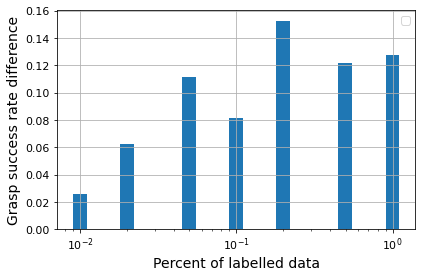

In [170]:
x = teacher_scaling.loc[:, 'Labelled-data'].to_numpy()
y = student_scaling.loc[:, 'Val-success-rate'] - teacher_scaling.loc[:, 'Val-success-rate'].to_numpy()
plt.bar(x, y, width=np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])/5)
plt.xlabel('Percent of labelled data')
plt.xscale('log')
plt.ylabel('Grasp success rate difference')
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.savefig('teacher-student-difference.pdf')

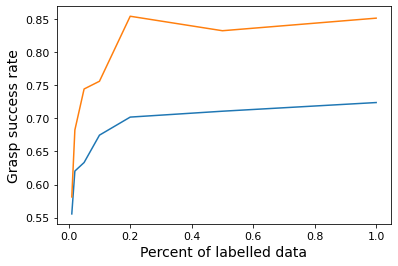

In [171]:
compare(teacher_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate')
compare(student_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate')

In [172]:
# compare(teacher_scaling, 'Labelled-data', 'Val-entropy', 'Percent of labelled data', 'Grasp success rate')
# compare(student_scaling, 'Labelled-data', 'Val-entropy', 'Percent of labelled data', 'Grasp success rate')

In [173]:
student_topn_ablation['Val-success-rate']

21    0.8516
22    0.8339
23    0.7288
24    0.6792
25       NaN
Name: Val-success-rate, dtype: float64

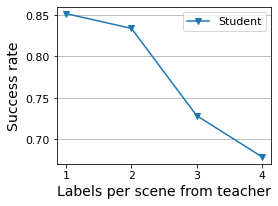

In [174]:
compare(student_topn_ablation, 'topn', 'Val-success-rate', 'Labels per scene from teacher', 'Success rate', label='Student', marker='v')
plt.legend()
ax = plt.gca()
ax.yaxis.grid()
plt.gcf().set_size_inches((4, 3))
plt.tight_layout()
plt.savefig('student-topn.pdf', dpi=300)

In [175]:
student_angle_ablation['Val-success-rate']

14    0.5833
15    0.6820
16    0.7353
17    0.8109
18    0.8516
19    0.8858
20    0.8865
Name: Val-success-rate, dtype: float64

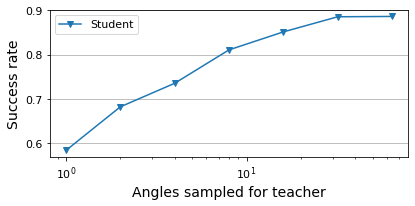

In [176]:
compare(student_angle_ablation, 'rotations', 'Val-success-rate', 'Angles sampled for teacher', 'Success rate', xlog=True, label='Student', marker='v')
plt.legend()
ax = plt.gca()
ax.yaxis.grid()
plt.gcf().set_size_inches((6, 3))
plt.tight_layout()
plt.savefig('student-angle-resolution.pdf', dpi=300)

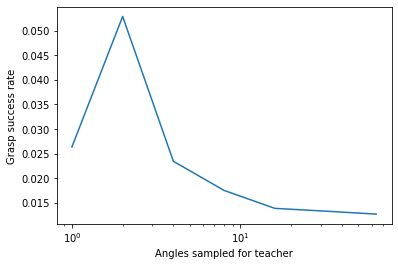

In [18]:
compare(student_angle_ablation, 'rotations', 'Train-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True, label='student')


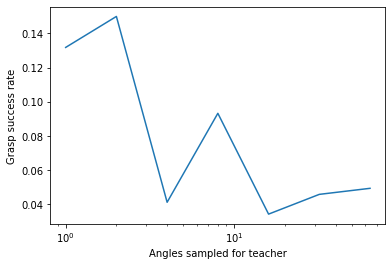

In [19]:
compare(student_angle_ablation, 'rotations', 'Val-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True)

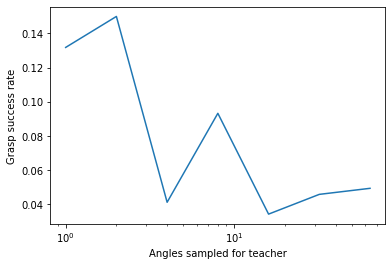

In [20]:
compare(student_angle_ablation, 'rotations', 'Val-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True)